<a href="https://colab.research.google.com/github/drcjaudet/GT_Thyroide_publique/blob/main/AnalyseGTthyroide_statistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importation des librairies

In [1]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint
import os
import seaborn as sn
import math


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%pip install keras-tuner --upgrade
import keras_tuner as kt
from keras import regularizers
########


!pip install scikit-posthocs
import pandas as pad
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scikit_posthocs as sp

import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.stats.multicomp as multi



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


#Importation des données

In [4]:
#importation des données
df_data = pd.read_csv('/content/data_GTthyroide/Recueil_global_V15_7(1).csv',sep=";",encoding='latin1') #
df_data

,CONFIG_ETUDE,Centre,N_Cyril,config,acq,Proto,fant,Type_centre,N_Patients,Utilisation,...,Coups Totaux(kCps)_F_40%,Nombre de Pixel_F_40%,CV(%)_F_40%,Rcentre de gravite(mm)_F_40%,surface(mm^2)_F_40%,sensibilite (Cps/(MBq.s))_40%,SAM (kCps),sensibilite SAM (Cps/(MBq.s))),CDMnorm (%),LimiteCDM2STD
0,1,11,387.0,1,1,Std,IRSN-3,CHU,200.0,Routine,...,64.584,348.0,0.236180,189.581815,424.839795,46.800000,95.332049,69.081195,0.147723,1
1,1,11,384.0,1,2,Std,IRSN-10,CHU,NaN,NaN,...,70.017,534.0,0.233994,193.141937,651.909341,45.583984,103.058400,67.095313,0.359580,1
2,1,11,385.0,1,3,Std,IRSN-15,CHU,NaN,NaN,...,66.820,712.0,0.231227,195.075560,869.212455,45.829904,96.750037,66.358050,0.484132,1
3,1,11,386.0,1,4,Std,IRSN-20,CHU,NaN,NaN,...,75.060,918.0,0.216071,197.298754,1120.698081,49.642857,107.764649,71.272916,0.356766,1
4,1,11,388.0,1,5,Std,IRSN-30,CHU,NaN,NaN,...,73.912,1250.0,0.211892,196.255326,1526.005013,48.498688,101.204405,66.407090,-0.004571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,52,20,609.0,3,10,Local,IRSN-15,CH,NaN,NaN,...,23.080,1121.0,0.207144,141.078282,828.214538,39.578587,68.116980,116.809958,-3.330205,1
724,52,20,610.0,3,11,Local,IRSN-20,CH,NaN,NaN,...,17.430,1210.0,0.182041,169.347321,893.969305,27.680657,68.207030,108.319873,3.564121,1
725,52,20,612.0,3,12,Local,IRSN-30,CH,NaN,NaN,...,16.184,1366.0,0.183167,174.929947,1009.224851,24.786932,68.350543,104.683653,4.518374,1
726,52,20,614.0,3,13,Local,Seringue,CH,NaN,NaN,...,44.490,1491.0,0.207418,158.768396,1101.577052,87.355061,68.021942,133.559472,0.322946,1


In [5]:
type(df_data)

pandas.core.frame.DataFrame

In [6]:
#remplace , par .
df_data = df_data.replace(',','.', regex=True)

In [7]:
#Supprimer les lignes avec des Nan: (Pas bonne idée ;)
#index_with_nan = df_data.index[df_data.isnull().any(axis=1)]
#df_data.drop(index_with_nan,0, inplace=True)

#df_data

In [8]:
df_data.head()

,CONFIG_ETUDE,Centre,N_Cyril,config,acq,Proto,fant,Type_centre,N_Patients,Utilisation,...,Coups Totaux(kCps)_F_40%,Nombre de Pixel_F_40%,CV(%)_F_40%,Rcentre de gravite(mm)_F_40%,surface(mm^2)_F_40%,sensibilite (Cps/(MBq.s))_40%,SAM (kCps),sensibilite SAM (Cps/(MBq.s))),CDMnorm (%),LimiteCDM2STD
0,1,11,387.0,1,1,Std,IRSN-3,CHU,200.0,Routine,...,64.584,348.0,0.236180,189.581815,424.839795,46.800000,95.332049,69.081195,0.147723,1
1,1,11,384.0,1,2,Std,IRSN-10,CHU,NaN,NaN,...,70.017,534.0,0.233994,193.141937,651.909341,45.583984,103.058400,67.095313,0.359580,1
2,1,11,385.0,1,3,Std,IRSN-15,CHU,NaN,NaN,...,66.820,712.0,0.231227,195.075560,869.212455,45.829904,96.750037,66.358050,0.484132,1
3,1,11,386.0,1,4,Std,IRSN-20,CHU,NaN,NaN,...,75.060,918.0,0.216071,197.298754,1120.698081,49.642857,107.764649,71.272916,0.356766,1
4,1,11,388.0,1,5,Std,IRSN-30,CHU,NaN,NaN,...,73.912,1250.0,0.211892,196.255326,1526.005013,48.498688,101.204405,66.407090,-0.004571,1


In [9]:
df_data.columns

Index(['CONFIG_ETUDE', 'Centre', 'N_Cyril', 'config', 'acq', 'Proto', 'fant',
       'Type_centre', 'N_Patients', 'Utilisation',
       ...
       'Coups Totaux(kCps)_F_40%', 'Nombre de Pixel_F_40%', 'CV(%)_F_40%',
       'Rcentre de gravite(mm)_F_40%', 'surface(mm^2)_F_40%',
       'sensibilite (Cps/(MBq.s))_40%', ' SAM (kCps)',
       'sensibilite SAM (Cps/(MBq.s)))', 'CDMnorm (%)', 'LimiteCDM2STD'],
      dtype='object', length=197)

In [10]:
df_data["sensibilite (Cps/(MBq.s))_5%"][0]

68.32971014

#prétraitement des données

In [11]:
list_sensibilite=["sensibilite (Cps/(MBq.s))_5%","sensibilite (Cps/(MBq.s))_10%","sensibilite (Cps/(MBq.s))_15%","sensibilite (Cps/(MBq.s))_20%","sensibilite (Cps/(MBq.s))_25%","sensibilite (Cps/(MBq.s))_30%","sensibilite (Cps/(MBq.s))_35%","sensibilite (Cps/(MBq.s))_40%"]
List_ErreurRelative=['sensibiliteError_5%','sensibiliteError_10%','sensibiliteError_15%','sensibiliteError_20%','sensibiliteError_25%','sensibiliteError_30%','sensibiliteError_35%','sensibiliteError_40%']

In [12]:
df_data["fant"].unique()

array(['IRSN-3', 'IRSN-10', 'IRSN-15', 'IRSN-20', 'IRSN-30', 'Seringue',
       'Routine'], dtype=object)

In [13]:
#Création d'une collone d'erreur relative sur la mesure d'activité par rapport à seringue seuil 10%

liste_centre_selection=df_data["Centre"].unique()

df_data['sensibiliteError_5%'] = ''
df_data['sensibiliteError_10%'] = ''
df_data['sensibiliteError_15%'] = ''
df_data['sensibiliteError_20%'] = ''
df_data['sensibiliteError_25%'] = ''
df_data['sensibiliteError_30%'] = ''
df_data['sensibiliteError_35%'] = ''
df_data['sensibiliteError_40%'] = ''



In [14]:
# Calculating the relative error on sensitivity
for centre in liste_centre_selection:
    Data_Centre = df_data[df_data["Centre"] == centre]

    if not Data_Centre.empty:
        liste_config = Data_Centre["config"].unique()

        for config in liste_config:
            Data_config = Data_Centre[Data_Centre["config"] == config]

            if not Data_config.empty:
                liste_protocole = Data_config["Proto"].unique()

                for protocole in liste_protocole:
                    Data_protocole = Data_config[Data_config["Proto"] == protocole]

                    if not Data_protocole.empty:
                        # Determine normalization criteria based on the protocol
                        NormBy ='IRSN-15'  if protocole == 'Std' else 'Routine' # 'IRSN-15'

                        # Get the normalization value
                        ValeurNorm = Data_protocole[Data_protocole["fant"] == NormBy]

                        if not ValeurNorm.empty:
                            ValeurNorm = float(ValeurNorm["sensibilite (Cps/(MBq.s))_10%"].iloc[0])
                            liste_fantome = Data_protocole["fant"].unique()

                            for fantome in liste_fantome:
                                Data_fantome = Data_protocole[Data_protocole["fant"] == fantome]

                                if not Data_fantome.empty and ValeurNorm != 0:
                                    for i in range(len(list_sensibilite)):
                                        try:
                                            # Calculate the relative error
                                            Y = ((float(Data_fantome[list_sensibilite[i]].iloc[0]) - ValeurNorm) / ValeurNorm) * 100

                                            # Update the DataFrame in one step using .loc[] to avoid chained assignment
                                            df_data.loc[
                                                (df_data["Centre"] == centre) &
                                                (df_data["config"] == config) &
                                                (df_data["Proto"] == protocole) &
                                                (df_data["fant"] == fantome),
                                                List_ErreurRelative[i]
                                            ] = Y
                                        except Exception as e:
                                            print(f"An error occurred: {e}")


In [15]:
# storing in new variable
data_top = df_data.head()

# iterating the columns
for row in data_top:
    print(row, end = " ")

CONFIG_ETUDE Centre N_Cyril config acq Proto fant Type_centre N_Patients Utilisation rmq_utilisation Marque Modele num_camera Modele_simple Annee_Installation Collimateur modele_colli facteur_stenope NaI_CZT Taille_Cristal Dimensions FOV Pixel Protocole Geometrie_Fantome Volume Conditionnement Fantome Type_fantome Commentaire_Fantome Distance_Source cale cale_new Distance Radionucleide Radionucleide_simple T_min l Justesse Source_Constance Calibre A_necessaire A_Prep Heure_Prep A_seringue_vide Heure_seringue_vide Heure_acq delta_t_prep delta_t_seringue A_acq A_acq_corr TC Nom_Protocole Duree Kcps Zoom Matrice Energie Fenetre_spectro Calibrage_Patient Calibrage_Facteur Geometrie_Cali_F Nom_Console Nom_PRG Facteur_calibrage Contourage Seuil Nb_kCps_ROI Nb_kCps_BGRD BGRD_O_N Indice_Thyroidien  Nom_Fichier_DICOM Remarques Unnamed: 1 PatientName PatientID StudyDate (YYMMDD) AcquisitionDate (YYMMDD) AcquisitionTime (hhmmss) Modality SeriesDescription ManufacturerModelName ProtocolName PixelS

In [16]:
df_data["modele_colli"].unique()

array(['LEHR', 'GPPH', nan, 'LEHRS', 'WEHR45'], dtype=object)

In [17]:
df_data["Collimateur"].unique()

array(['PARA', 'Pinhole'], dtype=object)

In [18]:
df_data["fant"].unique()

array(['IRSN-3', 'IRSN-10', 'IRSN-15', 'IRSN-20', 'IRSN-30', 'Seringue',
       'Routine'], dtype=object)

In [19]:
df_data["Centre"].unique()

array([11, 14, 10, 17,  4,  9,  2, 12,  8, 13,  3,  7, 15,  1,  6,  5, 41,
       18, 16, 19, 20])

In [20]:
df_data['Proto'].unique()

array(['Std', 'Local'], dtype=object)

In [21]:
df_data["Radionucleide_simple"].unique()

array(['I', 'Tc'], dtype=object)

In [22]:
df_data["NaI_CZT"].unique()

array(['NaI', 'CZT'], dtype=object)

In [23]:
df_data["Pixel"]

,Pixel
0,1.105
1,1.105
2,1.105
3,1.105
4,1.105
...,...
723,0.860
724,0.860
725,0.860
726,0.860


#selection des données

In [24]:
#si pas de sélection:
df_data_TrierCollimatteur=df_data

###selectionne les numeriques:
df_data_TrierCollimatteur =df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur["NaI_CZT"] == 'NaI'] #enléve les CZT

###selectionne les fantomes bien remplient:
#df_data_TrierCollimatteur =df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur["limiteCDM2STD"] == 1] #enléve les fantome donc le cdm bouge de plus de 2*STD

Collimateur='Pinhole' #enléve les Pinhole "Pinhole" ou PARA
Proto='Local' # Std ou Local
Radionucleide_simple='I' #ou I, Tc

name_serie='data_'+Collimateur+'_'+Proto+'_'+Radionucleide_simple

###selectionne les collimateurs //:
df_data_TrierCollimatteur =df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur["Collimateur"] == Collimateur] #selectionne les pinholes "Pinhole" ou PARA
###enléve les fantome de routine:
df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur['fant'] != 'Routine']
###enléve les fantome de calibration seringue:
df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur['fant'] != 'Seringue']
#selectionne protocole
df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur['Proto'] ==Proto]  # Std ou Local
#selectionne iode ou Tc
df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur["Radionucleide_simple"] == Radionucleide_simple] #ou I, Tc
#selectionne iode ou Tc
#df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur["Marque"] == 'GE'] #ou I
#selectionne collimatteur
#df_data_TrierCollimatteur = df_data_TrierCollimatteur.loc[df_data_TrierCollimatteur['modele_colli'] != 'lHR'] #ou I #enléve les czt

#df_data_TrierCollimatteur[["Collimateur","fant","Proto"]]
#print(df_data_TrierCollimatteur.count().)



In [25]:
list_seuil=["_5%","_10%","_15%","_20%","_25%","_30%","_35%","_40%"]
list_seuil_max=[" Seuil(% max)_5%"," Seuil(% max)_10%"," Seuil(% max)_15%"," Seuil(% max)_20%"," Seuil(% max)_25%"," Seuil(% max)_30%"," Seuil(% max)_35%"," Seuil(% max)_40%"]#"Seuil(% max)_40%"]
list_sensibilite=["sensibilite (Cps/(MBq.s))_5%","sensibilite (Cps/(MBq.s))_10%","sensibilite (Cps/(MBq.s))_15%","sensibilite (Cps/(MBq.s))_20%","sensibilite (Cps/(MBq.s))_25%","sensibilite (Cps/(MBq.s))_30%","sensibilite (Cps/(MBq.s))_35%","sensibilite (Cps/(MBq.s))_40%"]
List_ErreurRelative=['sensibiliteError_5%','sensibiliteError_10%','sensibiliteError_15%','sensibiliteError_20%','sensibiliteError_25%','sensibiliteError_30%','sensibiliteError_35%','sensibiliteError_40%']
list_sensibilite

['sensibilite (Cps/(MBq.s))_5%',
 'sensibilite (Cps/(MBq.s))_10%',
 'sensibilite (Cps/(MBq.s))_15%',
 'sensibilite (Cps/(MBq.s))_20%',
 'sensibilite (Cps/(MBq.s))_25%',
 'sensibilite (Cps/(MBq.s))_30%',
 'sensibilite (Cps/(MBq.s))_35%',
 'sensibilite (Cps/(MBq.s))_40%']

In [26]:
###valeur à zéros?
df_data_TrierCollimatteur
#export to test:
#df_data_TrierCollimatteur.to_csv('/content/cycy/donneepretraiter.csv')
#que faut-il garder:
#"Marque","Modele_simple", "modele_colli", "Taille_Cristal", "Pixel", "Volume", "Distance", "A_acq_corr", "Duree", "Facteur_calibrage"

,CONFIG_ETUDE,Centre,N_Cyril,config,acq,Proto,fant,Type_centre,N_Patients,Utilisation,...,CDMnorm (%),LimiteCDM2STD,sensibiliteError_5%,sensibiliteError_10%,sensibiliteError_15%,sensibiliteError_20%,sensibiliteError_25%,sensibiliteError_30%,sensibiliteError_35%,sensibiliteError_40%
63,5,10,NaN,2,8,Local,IRSN-3,CLCC,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,5,10,NaN,2,9,Local,IRSN-10,CLCC,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,5,10,NaN,2,10,Local,IRSN-15,CLCC,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,5,10,NaN,2,11,Local,IRSN-20,CLCC,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,5,10,NaN,2,12,Local,IRSN-30,CLCC,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,9,17,534.0,2,8,Local,IRSN-3,CHU,NaN,NaN,...,-5.289887,1,23.136943,17.697865,7.356319,-0.808737,-10.579329,-23.737004,-32.794979,-48.639995
120,9,17,531.0,2,9,Local,IRSN-10,CHU,NaN,NaN,...,76.114208,0,17.106622,14.020439,3.860083,-1.510677,-14.925554,-21.659044,-35.723222,-42.997796
121,9,17,532.0,2,10,Local,IRSN-15,CHU,NaN,NaN,...,37.394200,0,5.177571,1.259709,-10.196959,-16.280146,-32.306445,-40.707036,-54.582495,-61.274
122,9,17,533.0,2,11,Local,IRSN-20,CHU,NaN,NaN,...,35.478212,0,-8.334449,-13.515449,-20.91506,-29.242802,-47.888044,-56.654422,-64.054034,-71.692035
123,9,17,535.0,2,12,Local,IRSN-30,CHU,NaN,NaN,...,38.423011,0,-13.431953,-18.097486,-25.176226,-34.570495,-45.280537,-55.450479,-65.172255,-73.236388


In [27]:
# storing in new variable
data_top = df_data_TrierCollimatteur.head()

# iterating the columns
for row in data_top:
    print(row, end = " ")

CONFIG_ETUDE Centre N_Cyril config acq Proto fant Type_centre N_Patients Utilisation rmq_utilisation Marque Modele num_camera Modele_simple Annee_Installation Collimateur modele_colli facteur_stenope NaI_CZT Taille_Cristal Dimensions FOV Pixel Protocole Geometrie_Fantome Volume Conditionnement Fantome Type_fantome Commentaire_Fantome Distance_Source cale cale_new Distance Radionucleide Radionucleide_simple T_min l Justesse Source_Constance Calibre A_necessaire A_Prep Heure_Prep A_seringue_vide Heure_seringue_vide Heure_acq delta_t_prep delta_t_seringue A_acq A_acq_corr TC Nom_Protocole Duree Kcps Zoom Matrice Energie Fenetre_spectro Calibrage_Patient Calibrage_Facteur Geometrie_Cali_F Nom_Console Nom_PRG Facteur_calibrage Contourage Seuil Nb_kCps_ROI Nb_kCps_BGRD BGRD_O_N Indice_Thyroidien  Nom_Fichier_DICOM Remarques Unnamed: 1 PatientName PatientID StudyDate (YYMMDD) AcquisitionDate (YYMMDD) AcquisitionTime (hhmmss) Modality SeriesDescription ManufacturerModelName ProtocolName PixelS

In [28]:
#df_data_TrierCollimatteur[' Seuil(% max)_5%']

In [29]:
#reformat 1 ligne par seuil:,"CDM normalise"
Df_trier = pd.DataFrame()
for i in range(len(list_seuil_max)):
  #print(i) "Marque", "modele_colli",
  #list_extraction=["Modele","Marque","Pixel","Volume",list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]#"modele_colli","modele_colli","Taille_Cristal",
  #list_extraction=["Modele","Marque","modele_colli","Taille_Cristal","Pixel","Volume",list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]#"modele_colli",
  #list_extraction=["Centre","config","Modele","Marque","modele_colli","Taille_Cristal","Pixel","Duree","Distance","Volume","Radionucleide_simple",list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]#
  #list_extraction=["Marque","Modele","modele_colli","Taille_Cristal","Pixel","Duree","Distance","Volume",list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]#
  #list_extraction=["Centre","Marque","Modele_simple", "modele_colli", "Taille_Cristal", "Pixel", "Volume", "Distance", "Duree", "A_acq_corr" ,list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]# pour colli // local
  list_extraction=["Centre","Marque","Modele_simple","facteur_stenope", "Taille_Cristal", "Pixel", "Volume", "Distance", "Duree","A_acq_corr", list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]# pour colli sténopé local
  #list_extraction=["Centre","Marque","Modele_simple", "modele_colli", "Taille_Cristal", "Pixel", "Volume", "A_acq_corr" ,list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]# pour colli // std
  #list_extraction=["Centre","Marque","Modele_simple","Taille_Cristal", "facteur_stenope", "Pixel", "Volume", "A_acq_corr" ,list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]# pour colli sténopé std , "facteur_stenope",
  Df_temporary=df_data_TrierCollimatteur[list_extraction].copy()
  Df_temporary=Df_temporary.rename(columns={list_seuil_max[i]: "Seuil", list_sensibilite[i]: "Sensibilite",List_ErreurRelative[i]:"ErreurRelative"})
  Df_trier=pd.concat([Df_trier,Df_temporary], axis=0)

Df_trier

,Centre,Marque,Modele_simple,facteur_stenope,Taille_Cristal,Pixel,Volume,Distance,Duree,A_acq_corr,Seuil,Sensibilite,ErreurRelative
63,10,Siemens,CG13,4.00,1.59,NaN,NaN,NaN,NaN,5.075608,NaN,NaN,NaN
64,10,Siemens,CG13,4.00,1.59,NaN,NaN,NaN,NaN,5.165809,NaN,NaN,NaN
65,10,Siemens,CG13,4.00,1.59,NaN,NaN,NaN,NaN,5.380747,NaN,NaN,NaN
66,10,Siemens,CG13,4.00,1.59,NaN,NaN,NaN,NaN,5.094150,NaN,NaN,NaN
67,10,Siemens,CG13,4.00,1.59,NaN,NaN,NaN,NaN,5.271341,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,20,GE,GC6,4.45,0.95,0.86,3.0,4.0,126.0,3.780000,40.0,62.345652,-10.312806
722,20,GE,GC6,4.45,0.95,0.86,8.0,4.0,125.0,4.270000,40.0,45.760005,-34.17205
723,20,GE,GC6,4.45,0.95,0.86,11.0,4.0,134.0,4.350000,40.0,39.578587,-43.064314
724,20,GE,GC6,4.45,0.95,0.86,19.0,4.0,145.0,4.330000,40.0,27.680657,-60.180055


In [30]:
##vire les nan
Df_trier=Df_trier.dropna(axis=0)

In [31]:
#Elimine les zeros et valeur bizzare qui pourrait rester?
Df_trier['Sensibilite'].unique()

array([285.3626774 , 271.3877623 , 243.742881  , 212.429564  ,
       200.6163963 , 196.731593  , 221.7730924 , 201.08166   ,
       185.7951807 , 173.9866131 ,  32.73067633,  33.26500297,
        32.3086983 ,  30.55432781,  29.55576679, 131.0471888 ,
       122.7681087 , 117.4686452 , 105.2546854 ,  99.53822938,
        49.54311544,  50.05039297,  48.47481685,  46.49654219,
        43.0361528 ,  35.262     ,  35.41176471,  34.57953795,
        32.51770207,  31.53359426, 117.546788  , 116.1290778 ,
       106.5610027 ,  97.26301253,  93.47068062, 136.8946414 ,
       129.7229493 , 125.8988438 , 114.2605484 , 108.5808171 ,
       141.0295841 , 127.0054112 , 115.739931  , 106.5983206 ,
       102.1725782 , 272.7579322 , 264.235713  , 234.663465  ,
       200.4228998 , 189.8042957 , 192.2663989 , 217.1091031 ,
       194.1572959 , 179.1345382 , 168.2021419 ,  31.79861111,
        32.36393345,  31.38351582,  29.39533456,  28.55069708,
       128.0359772 , 119.5526492 , 114.5876928 , 102.93

In [32]:
#Df_trier["modele_colli"].unique()

In [33]:
#Protocole standardisé:
#Ne garde qu'un seuil:
###selectionne seuil
#Df_trier = Df_trier.loc[Df_trier["Seuil"] == 10] #ou I
#Df_trier=Df_trier.drop(columns=['Seuil'])
###Ne garde qu'une durée:
#Df_trier = Df_trier.loc[Df_trier["Duree"] == 300.0] #ou I
#Df_trier=Df_trier.drop(columns=['Duree'])
###Ne garde qu'une distance:
#Df_trier = Df_trier.loc[Df_trier["Distance"] == 8.0] #ou I
#Df_trier=Df_trier.drop(columns=['Distance'])

In [34]:
Df_trier

,Centre,Marque,Modele_simple,facteur_stenope,Taille_Cristal,Pixel,Volume,Distance,Duree,A_acq_corr,Seuil,Sensibilite,ErreurRelative
119,17,GE,GC10,4.45,0.95,1.766,3.0,1.0,20.0,5.15,5.0,285.362677,23.136943
120,17,GE,GC10,4.45,0.95,1.766,8.0,1.0,21.0,5.07,5.0,271.387762,17.106622
121,17,GE,GC10,4.45,0.95,1.766,11.0,1.0,24.0,4.97,5.0,243.742881,5.177571
122,17,GE,GC10,4.45,0.95,1.766,19.0,1.0,27.0,4.99,5.0,212.429564,-8.334449
123,17,GE,GC10,4.45,0.95,1.766,30.0,1.0,30.0,5.04,5.0,200.616396,-13.431953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,20,GE,GC6,4.45,0.95,0.860,3.0,4.0,126.0,3.78,40.0,62.345652,-10.312806
722,20,GE,GC6,4.45,0.95,0.860,8.0,4.0,125.0,4.27,40.0,45.760005,-34.17205
723,20,GE,GC6,4.45,0.95,0.860,11.0,4.0,134.0,4.35,40.0,39.578587,-43.064314
724,20,GE,GC6,4.45,0.95,0.860,19.0,4.0,145.0,4.33,40.0,27.680657,-60.180055


In [35]:
#convertion de type:

#Df_trier["Facteur_calibrage"]=Df_trier["Facteur_calibrage"].fillna(0).astype('float64')
#Df_trier["A_acq_corr"]=Df_trier["A_acq_corr"].fillna(0).astype('float64')
Df_trier["Seuil"]=Df_trier["Seuil"].fillna(0).astype('float64')
Df_trier["Distance"]=Df_trier["Distance"].fillna(0).astype('float64')
Df_trier["Volume"]=Df_trier["Volume"].fillna(0).astype('float64')
Df_trier["Sensibilite"]=pd.to_numeric(Df_trier["Sensibilite"].fillna(0))#.astype('float64')
Df_trier["ErreurRelative"]=pd.to_numeric(Df_trier["ErreurRelative"].fillna(0))#.astype('float64')
Df_trier["Taille_Cristal"]=pd.to_numeric(Df_trier["Taille_Cristal"].fillna(0))#.astype('float64')
Df_trier["Pixel"]=pd.to_numeric(Df_trier["Pixel"].fillna(0))#.astype('float64')
Df_trier["Duree"]=pd.to_numeric(Df_trier["Duree"].fillna(0))#.astype('float64')
Df_trier['Centre'] = pd.to_numeric(Df_trier['Centre'].fillna(0))
#Df_trier['facteur_stenope'] = pd.to_numeric(Df_trier['facteur_stenope'].fillna(0))
#Df_trier['config'] = pd.to_numeric(Df_trier['config'].fillna(0))
Df_trier

<ipython-input-35-c12916361b58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_trier["Seuil"]=Df_trier["Seuil"].fillna(0).astype('float64')
<ipython-input-35-c12916361b58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_trier["Distance"]=Df_trier["Distance"].fillna(0).astype('float64')
<ipython-input-35-c12916361b58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Centre,Marque,Modele_simple,facteur_stenope,Taille_Cristal,Pixel,Volume,Distance,Duree,A_acq_corr,Seuil,Sensibilite,ErreurRelative
119,17,GE,GC10,4.45,0.95,1.766,3.0,1.0,20.0,5.15,5.0,285.362677,23.136943
120,17,GE,GC10,4.45,0.95,1.766,8.0,1.0,21.0,5.07,5.0,271.387762,17.106622
121,17,GE,GC10,4.45,0.95,1.766,11.0,1.0,24.0,4.97,5.0,243.742881,5.177571
122,17,GE,GC10,4.45,0.95,1.766,19.0,1.0,27.0,4.99,5.0,212.429564,-8.334449
123,17,GE,GC10,4.45,0.95,1.766,30.0,1.0,30.0,5.04,5.0,200.616396,-13.431953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,20,GE,GC6,4.45,0.95,0.860,3.0,4.0,126.0,3.78,40.0,62.345652,-10.312806
722,20,GE,GC6,4.45,0.95,0.860,8.0,4.0,125.0,4.27,40.0,45.760005,-34.172050
723,20,GE,GC6,4.45,0.95,0.860,11.0,4.0,134.0,4.35,40.0,39.578587,-43.064314
724,20,GE,GC6,4.45,0.95,0.860,19.0,4.0,145.0,4.33,40.0,27.680657,-60.180055


In [36]:
#categoriel to numerique:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label



Df_trier['Modele_simple'] = le.fit_transform(Df_trier['Modele_simple'])
#Df_trier["Radionucleide_simple"] = le.fit_transform(Df_trier["Radionucleide_simple"])
#Df_trier['Centre'] = le.fit_transform(Df_trier['Centre'])
#Df_trier['config'] = le.fit_transform(Df_trier['config'])
#Df_trier['Proto'] = le.fit_transform(Df_trier['Proto'])
Df_trier['Marque'] = le.fit_transform(Df_trier['Marque'])
#Df_trier['modele_colli'] = le.fit_transform(Df_trier['modele_colli'])
#Df_trier['Radionucleide_simple'] = le.fit_transform(Df_trier['Radionucleide_simple'])
# printing label
Df_trier


<ipython-input-36-3e96cab14f71>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_trier['Modele_simple'] = le.fit_transform(Df_trier['Modele_simple'])
<ipython-input-36-3e96cab14f71>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_trier['Marque'] = le.fit_transform(Df_trier['Marque'])


,Centre,Marque,Modele_simple,facteur_stenope,Taille_Cristal,Pixel,Volume,Distance,Duree,A_acq_corr,Seuil,Sensibilite,ErreurRelative
119,17,0,0,4.45,0.95,1.766,3.0,1.0,20.0,5.15,5.0,285.362677,23.136943
120,17,0,0,4.45,0.95,1.766,8.0,1.0,21.0,5.07,5.0,271.387762,17.106622
121,17,0,0,4.45,0.95,1.766,11.0,1.0,24.0,4.97,5.0,243.742881,5.177571
122,17,0,0,4.45,0.95,1.766,19.0,1.0,27.0,4.99,5.0,212.429564,-8.334449
123,17,0,0,4.45,0.95,1.766,30.0,1.0,30.0,5.04,5.0,200.616396,-13.431953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,20,0,3,4.45,0.95,0.860,3.0,4.0,126.0,3.78,40.0,62.345652,-10.312806
722,20,0,3,4.45,0.95,0.860,8.0,4.0,125.0,4.27,40.0,45.760005,-34.172050
723,20,0,3,4.45,0.95,0.860,11.0,4.0,134.0,4.35,40.0,39.578587,-43.064314
724,20,0,3,4.45,0.95,0.860,19.0,4.0,145.0,4.33,40.0,27.680657,-60.180055


In [37]:
#Df_trier[Df_trier['Distance']!=8.0]

In [38]:
#Choix d'un seuil:
#Df_trier[Df_trier['Seuil']==10.0]
#élimination de la colone
#Df_trier=Df_trier.drop(columns=['Seuil'])

In [39]:
#Choix d'un protocole:
#Df_trier[Df_trier['Proto']==0]
#élimination de la colone
#Df_trier=Df_trier.drop(columns=['Proto'])

In [40]:
#Df_trier["Centre"]

In [41]:
Df_trier.describe().T

,count,mean,std,min,25%,50%,75%,max
Centre,360.0,13.888889,6.252700e+00,4.000000,8.000000,17.000000,20.000000,20.000000
Marque,360.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
Modele_simple,360.0,2.444444,1.709297e+00,0.000000,1.000000,3.000000,4.000000,5.000000
facteur_stenope,360.0,4.450000,2.846127e-14,4.450000,4.450000,4.450000,4.450000,4.450000
Taille_Cristal,360.0,1.092222,2.664437e-01,0.950000,0.950000,0.950000,0.950000,1.590000
Pixel,360.0,1.424111,1.105930e+00,0.736000,0.860000,0.860000,1.380000,4.420000
Volume,360.0,14.200000,9.466198e+00,3.000000,8.000000,11.000000,19.000000,30.000000
Distance,360.0,5.888889,3.377608e+00,1.000000,4.000000,4.000000,8.000000,12.500000
Duree,360.0,384.688889,3.458286e+02,20.000000,142.000000,300.000000,600.000000,1200.000000
A_acq_corr,360.0,4.983556,9.569291e-01,3.780000,4.270000,4.980000,5.110000,7.330000


#bilan sur les données:

In [42]:
Df_trier.describe().T

,count,mean,std,min,25%,50%,75%,max
Centre,360.0,13.888889,6.252700e+00,4.000000,8.000000,17.000000,20.000000,20.000000
Marque,360.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
Modele_simple,360.0,2.444444,1.709297e+00,0.000000,1.000000,3.000000,4.000000,5.000000
facteur_stenope,360.0,4.450000,2.846127e-14,4.450000,4.450000,4.450000,4.450000,4.450000
Taille_Cristal,360.0,1.092222,2.664437e-01,0.950000,0.950000,0.950000,0.950000,1.590000
Pixel,360.0,1.424111,1.105930e+00,0.736000,0.860000,0.860000,1.380000,4.420000
Volume,360.0,14.200000,9.466198e+00,3.000000,8.000000,11.000000,19.000000,30.000000
Distance,360.0,5.888889,3.377608e+00,1.000000,4.000000,4.000000,8.000000,12.500000
Duree,360.0,384.688889,3.458286e+02,20.000000,142.000000,300.000000,600.000000,1200.000000
A_acq_corr,360.0,4.983556,9.569291e-01,3.780000,4.270000,4.980000,5.110000,7.330000


In [43]:
total = Df_trier.isnull().sum().sort_values(ascending=False)
percent = (Df_trier.isnull().sum()/Df_trier.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent


In [44]:
#elimine si trop de données manquante:
Df_trier = Df_trier[missing_data[missing_data['Percent'] < 0.15].index]

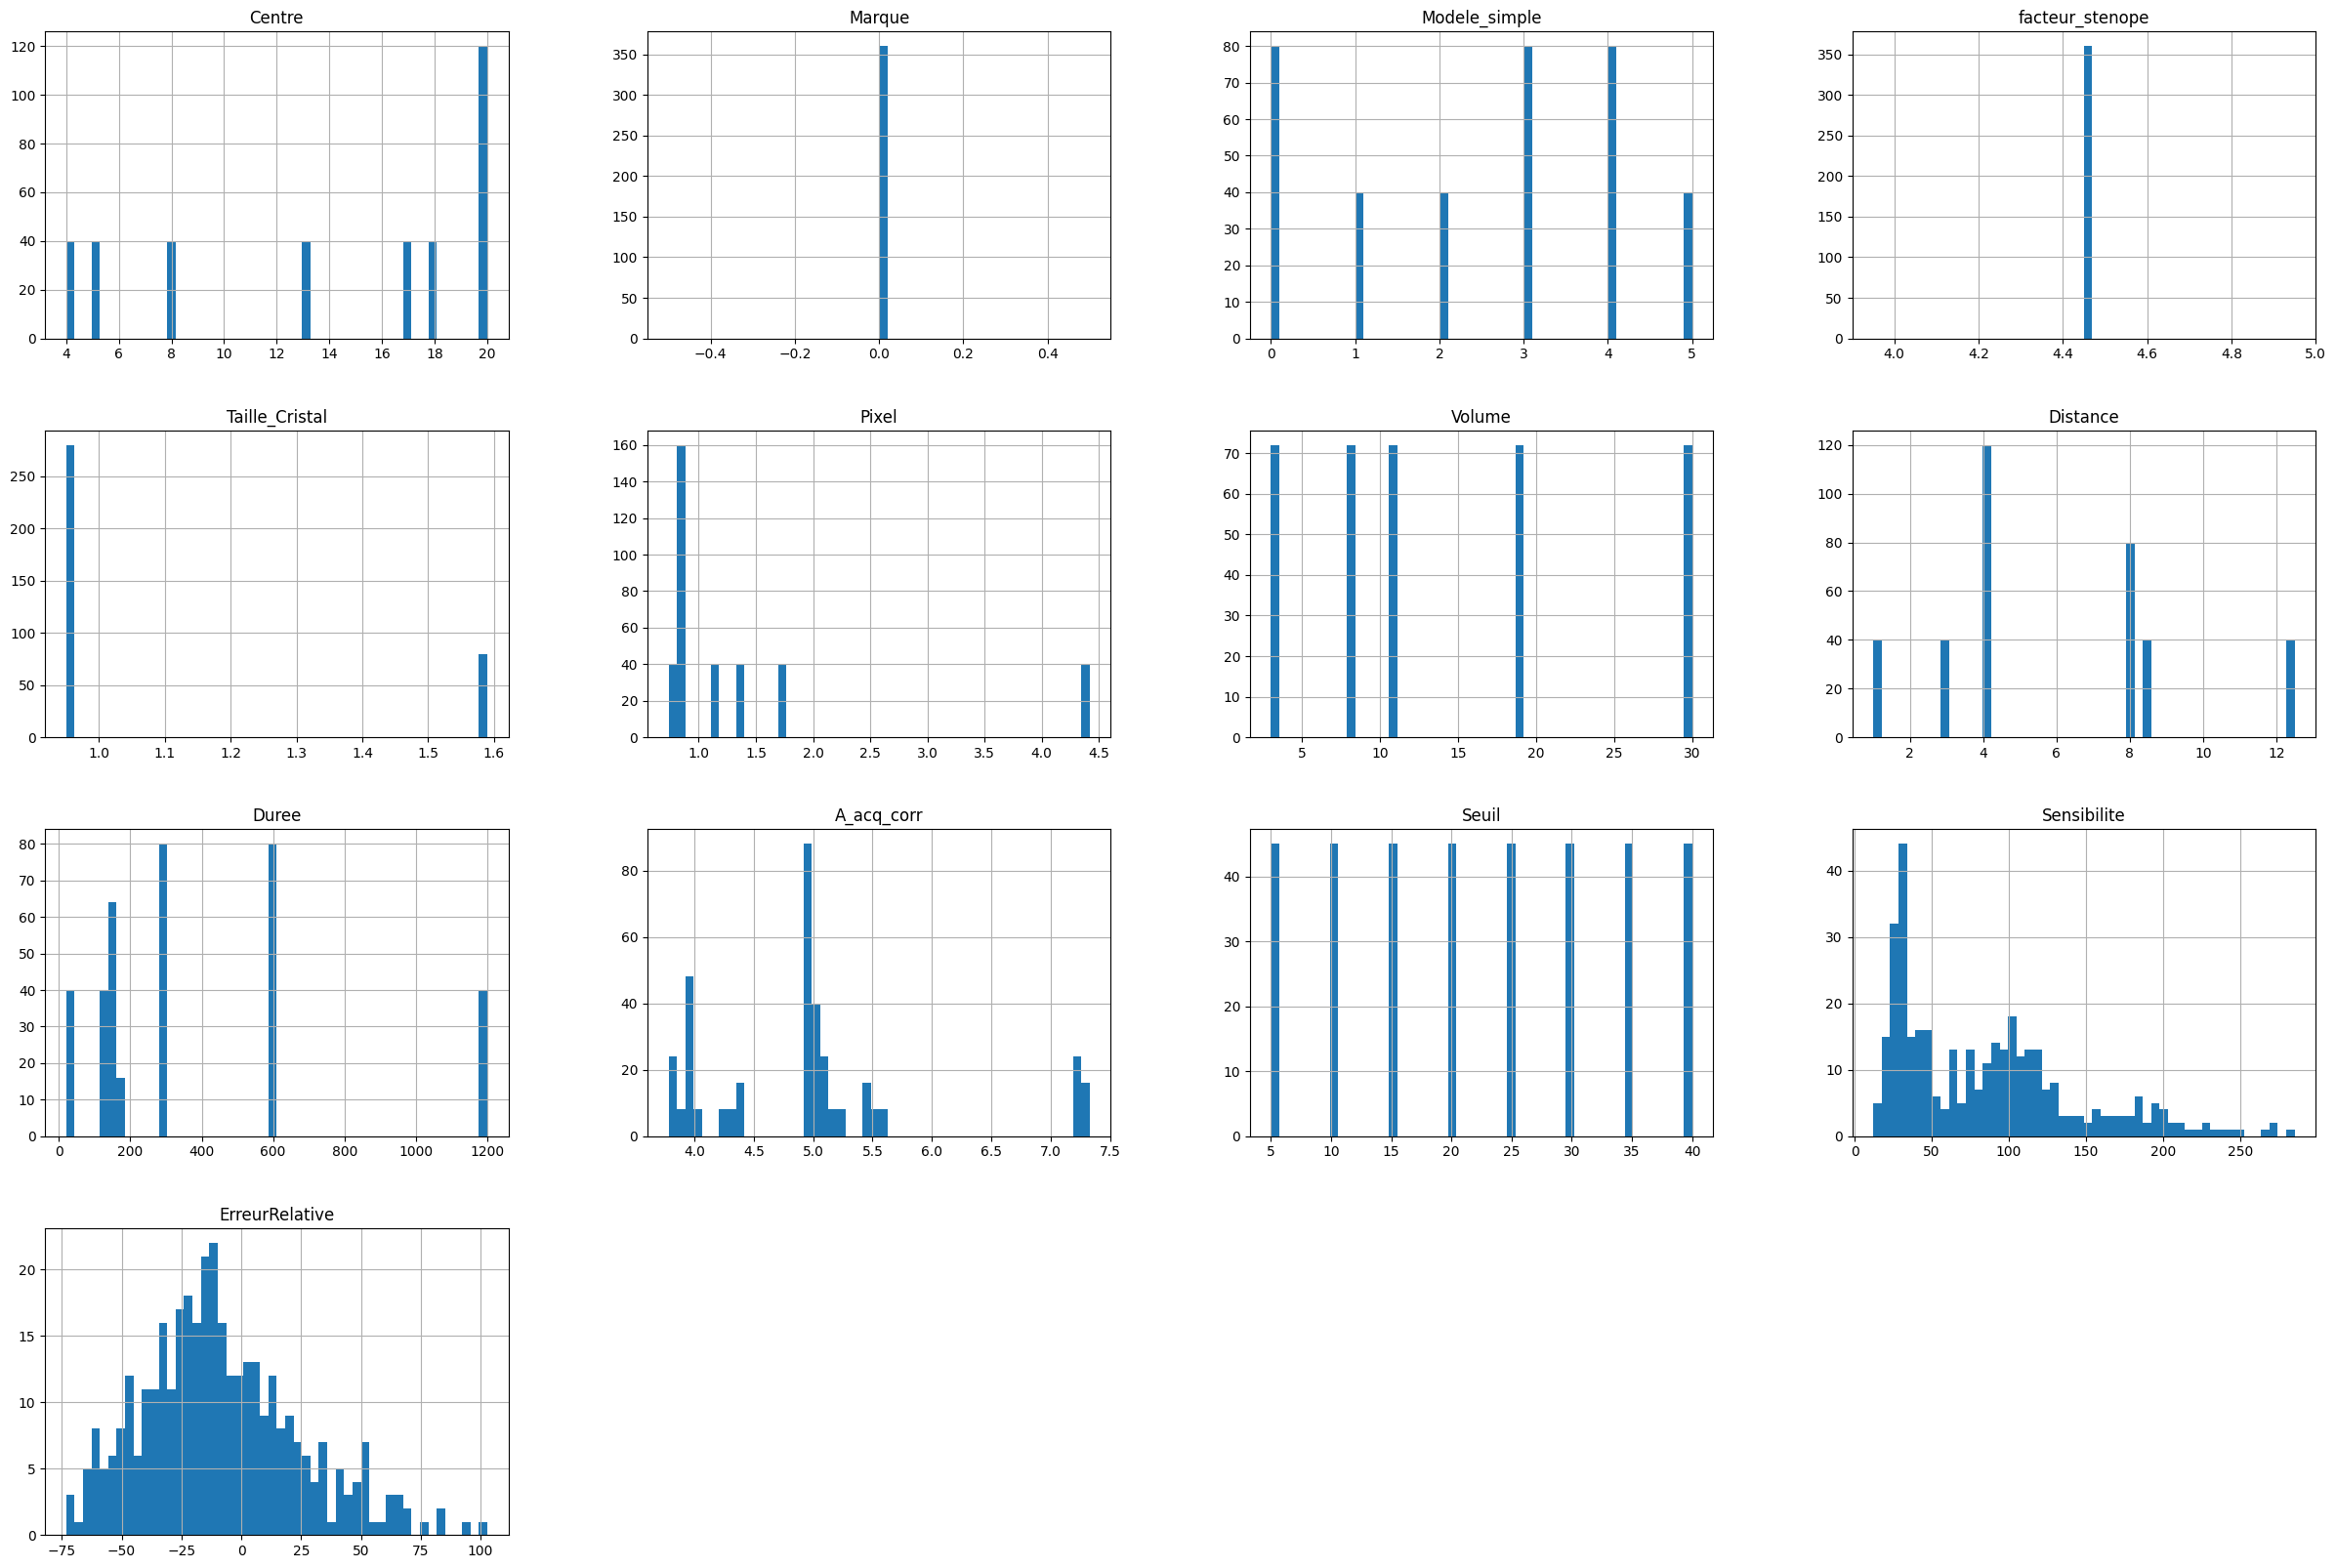

In [45]:
#distribution des données:
Df_trier.hist(bins=50, figsize=(30,20));

In [46]:
####analyse visuelle des correlations

#sns.set()
#cols =["Centre","config","fant","Marque","Modele","modele_colli","Taille_Cristal","Pixel","Radionucleide_simple","Proto","Duree","Distance","Volume","taille Matrice X","CDM normalise"]#,list_seuil_max[i],list_sensibilite[i],List_ErreurRelative[i]]
##cols =Df_trier.columns
#sns.pairplot(Df_trier, height = 2.5)
#plt.show();

In [47]:
Df_trier.columns

Index(['Centre', 'Marque', 'Modele_simple', 'facteur_stenope',
       'Taille_Cristal', 'Pixel', 'Volume', 'Distance', 'Duree', 'A_acq_corr',
       'Seuil', 'Sensibilite', 'ErreurRelative'],
      dtype='object')

#graph finalisé pour le rapport:

In [48]:
Df_trier.describe().T

,count,mean,std,min,25%,50%,75%,max
Centre,360.0,13.888889,6.252700e+00,4.000000,8.000000,17.000000,20.000000,20.000000
Marque,360.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
Modele_simple,360.0,2.444444,1.709297e+00,0.000000,1.000000,3.000000,4.000000,5.000000
facteur_stenope,360.0,4.450000,2.846127e-14,4.450000,4.450000,4.450000,4.450000,4.450000
Taille_Cristal,360.0,1.092222,2.664437e-01,0.950000,0.950000,0.950000,0.950000,1.590000
Pixel,360.0,1.424111,1.105930e+00,0.736000,0.860000,0.860000,1.380000,4.420000
Volume,360.0,14.200000,9.466198e+00,3.000000,8.000000,11.000000,19.000000,30.000000
Distance,360.0,5.888889,3.377608e+00,1.000000,4.000000,4.000000,8.000000,12.500000
Duree,360.0,384.688889,3.458286e+02,20.000000,142.000000,300.000000,600.000000,1200.000000
A_acq_corr,360.0,4.983556,9.569291e-01,3.780000,4.270000,4.980000,5.110000,7.330000


Text(0.5, 1.0, 'data_Pinhole_Local_I')

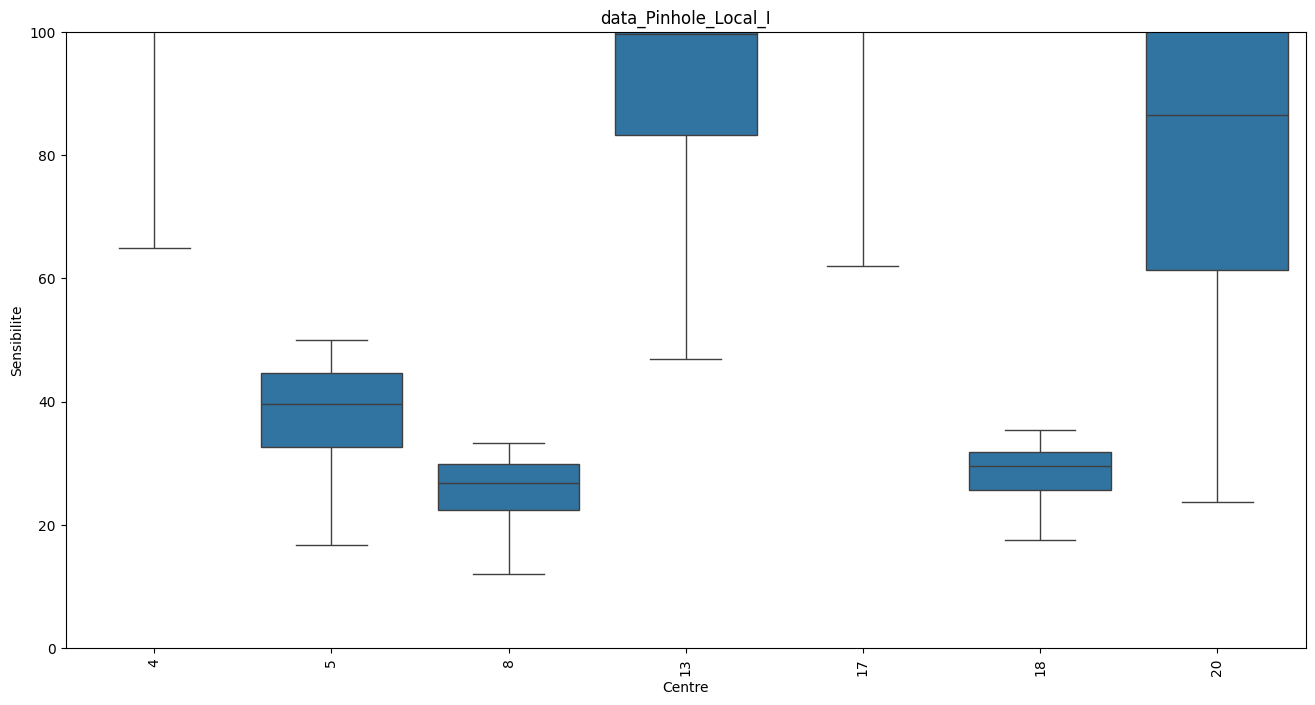

In [49]:
#boxplot test sensibilité:
var = 'Centre'
data = pd.concat([Df_trier['Sensibilite'], Df_trier[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Sensibilite", data=data)
fig.set_ylim([0, 100])
plt.xticks(rotation=90);
plt.title(name_serie)#"Data_local_Pinhole_Tc99m_PasCZT "

Text(0.5, 1.0, 'data_Pinhole_Local_I')

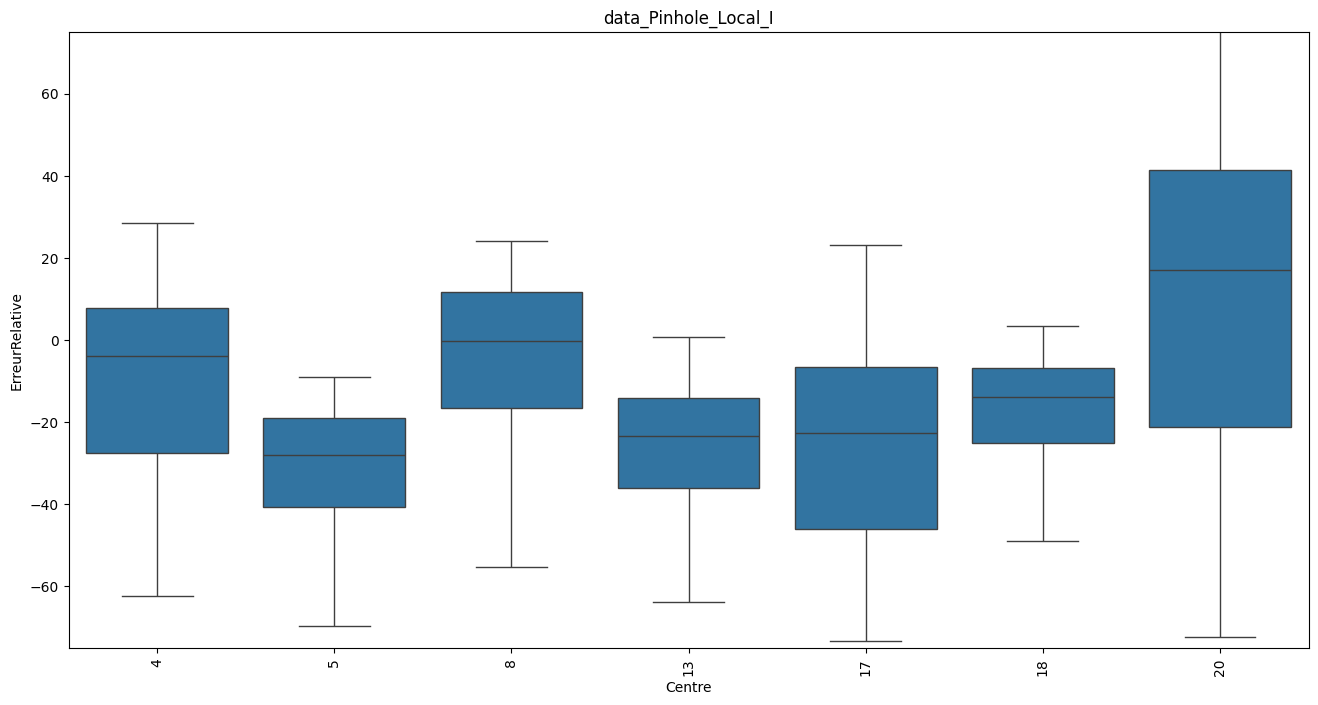

In [50]:
#boxplot test Erreur relative:
var = 'Centre'
data = pd.concat([Df_trier['ErreurRelative'], Df_trier[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="ErreurRelative", data=data)
fig.set_ylim([-75, 75])
plt.xticks(rotation=90);
plt.title(name_serie)

In [51]:
###virer le centre ;)
Df_trier=Df_trier.drop(['Centre'], axis=1)
Df_trier=Df_trier.drop(['A_acq_corr'], axis=1)


ShapiroResult(statistic=0.8992447379690487, pvalue=1.0474603527983706e-14)
AndersonResult(statistic=10.227387572677856, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=85.10870985138888, scale=58.24392907909821)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
NormaltestResult(statistic=49.357924436849274, pvalue=1.9145331452110853e-11)


<ipython-input-52-b2fb0e12893a>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df_trier['Sensibilite'], fit = norm)


<Axes: xlabel='Sensibilite', ylabel='Density'>

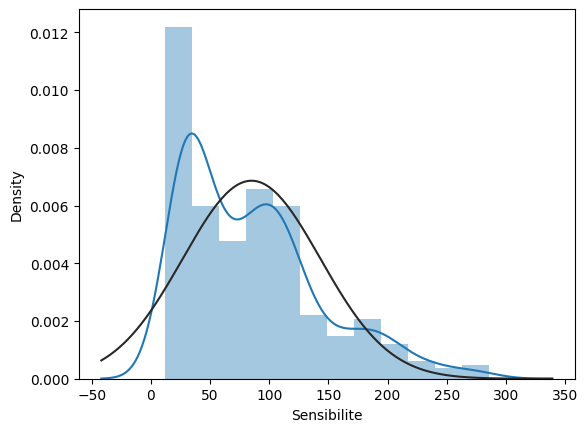

In [52]:
#test de distribution normal:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
donnee=Df_trier['Sensibilite']
#test de Shapiro–Wilk
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
from scipy.stats import shapiro
print(shapiro(donnee))
#test d'Anderson-Darling permet de tester d'autre distribution:
from scipy.stats import anderson
print(anderson(donnee, dist='norm'))
#test D’Agostino (normaltest)
from scipy.stats.mstats import normaltest
print(normaltest(donnee, axis=0))
#test de Kolmogorov-Smirnov?
sns.distplot(Df_trier['Sensibilite'], fit = norm)

In [53]:
import statsmodels
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
  return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

<Axes: >

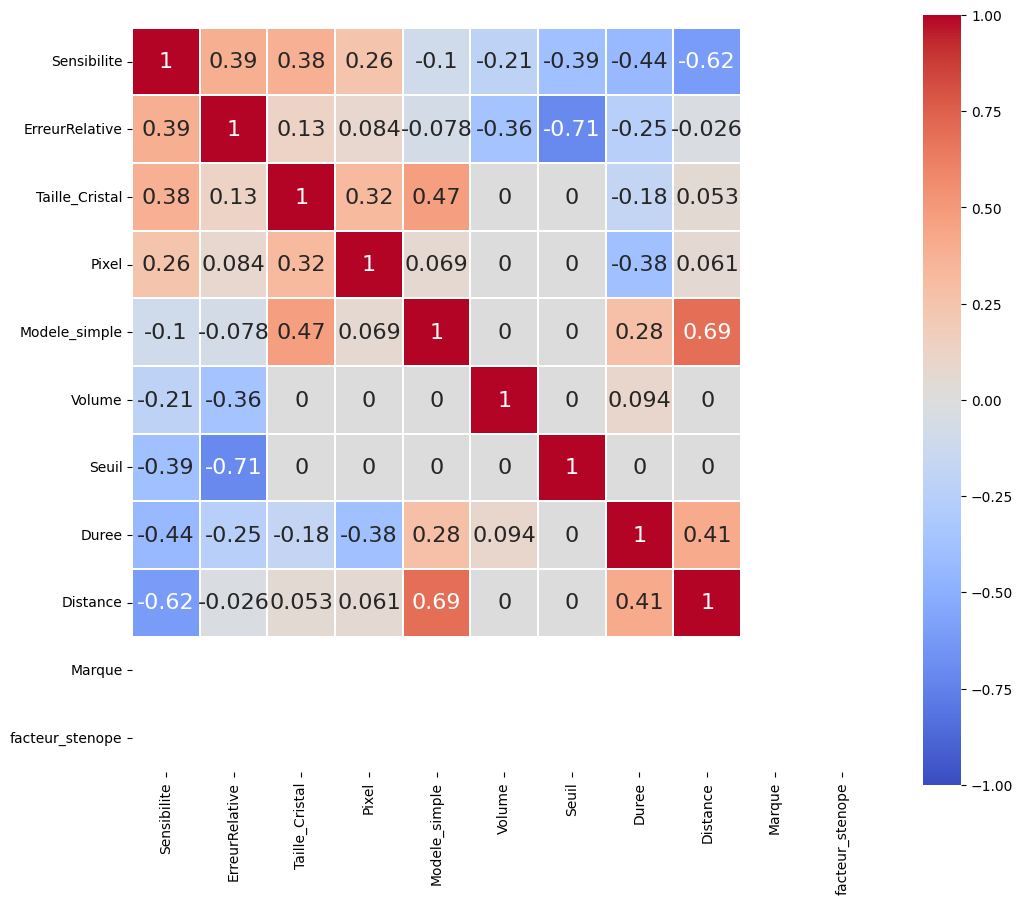

In [54]:
# 'Sensibilite' correlation matrix
#df_marks = df_marks.drop(['chemistry'], axis=1) #enléve l'erreur
k = 13
 #number of variables for heatmap
corrmat = Df_trier.corr(method='spearman')
ix = corrmat.sort_values('Sensibilite', ascending=False).index
Df_trier_sorted = Df_trier.loc[:, ix]
corrmat_sorted = Df_trier_sorted.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
cols=corrmat_sorted.index
#plt.xticks(rotation=0)
#plt.yticks(rotation=0)
ax.tick_params(axis='x', labelrotation=0)
ax.tick_params(axis='y', labelrotation=90)
sns.heatmap(corrmat_sorted, ax=ax, cmap="coolwarm", linewidths=0.3, yticklabels=cols.values, xticklabels=cols.values,annot=True,vmax=1, vmin=-1, center=0,  annot_kws={'size': 16}, square=True)

#si on veut rajouter le p values:
#https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77
#p_values =  Df_trier_sorted.corr(method=spearmanr_pval)
#mask_p = np.invert(np.tril(p_values<0.05))
#sns.heatmap(corrmat_sorted, ax=ax, cmap="coolwarm", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values,annot=True,vmax=1, vmin=-1, center=0, mask=mask_p)




In [55]:
#sensibilités names, coor, pvalue, pavlue corrected:
name='Sensibilite' #valeur avec lesquelle on recherche une correlation
corr_pvalue =  Df_trier.corr(method=spearmanr_pval)
#Sens_corr=[[]]
Df_Corr_Sens= pd.DataFrame()
Df_Corr_Sens['corr']=corrmat[name]
Df_Corr_Sens['Abs(corr)']=abs(corrmat[name])
Df_Corr_Sens['pvalue']=corr_pvalue[name].values
Df_Corr_Sens=Df_Corr_Sens.drop('Sensibilite', axis=0)
Df_Corr_Sens=Df_Corr_Sens.drop('ErreurRelative', axis=0)
Df_Corr_Sens=Df_Corr_Sens.sort_values(by='Abs(corr)', ascending=False)
#corr_pvalue['Sensibilite'].values
Df_Corr_Sens['benjaminiHochberg']=statsmodels.stats.multitest.multipletests(Df_Corr_Sens['pvalue'].values, alpha=0.05, method='fdr_bh', is_sorted=True, returnsorted=False)[0] #fdr_bh : Benjamini/Hochberg (non-negative)

Df_Corr_Sens

<ipython-input-53-71fb9f943a9b>:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(x,y)[1]


,corr,Abs(corr),pvalue,benjaminiHochberg
Distance,-0.616995,0.616995,3.844533e-39,True
Duree,-0.436710,0.436710,3.385326e-18,True
Seuil,-0.387613,0.387613,2.362528e-14,True
Taille_Cristal,0.380809,0.380809,7.205269e-14,True
Pixel,0.257270,0.257270,7.501461e-07,True
Volume,-0.214350,0.214350,4.120398e-05,True
Modele_simple,-0.099981,0.099981,5.806998e-02,False
Marque,NaN,NaN,NaN,False
facteur_stenope,NaN,NaN,NaN,False


In [56]:
Df_Corr_Sens['corr']

,corr
Distance,-0.616995
Duree,-0.436710
Seuil,-0.387613
Taille_Cristal,0.380809
Pixel,0.257270
Volume,-0.214350
Modele_simple,-0.099981
Marque,NaN
facteur_stenope,NaN


<ipython-input-57-43497cc35a11>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df_trier['ErreurRelative'], fit = norm)


ShapiroResult(statistic=0.976815579794686, pvalue=1.5507533869831954e-05)
AndersonResult(statistic=1.9789594185175474, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-8.726790584310136, scale=32.62087286140199)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
NormaltestResult(statistic=19.356363850354338, pvalue=6.263527593853346e-05)


<Axes: xlabel='ErreurRelative', ylabel='Density'>

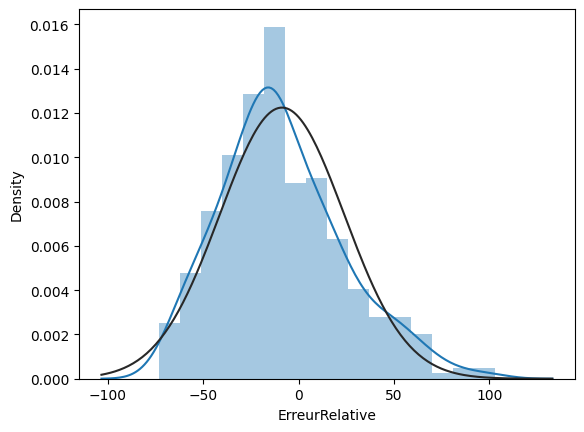

In [57]:
#test de distribution normal:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
donnee=Df_trier['ErreurRelative']
#test de Shapiro–Wilk
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
from scipy.stats import shapiro
print(shapiro(donnee))
#test d'Anderson-Darling permet de tester d'autre distribution:
from scipy.stats import anderson
print(anderson(donnee, dist='norm'))
#test D’Agostino (normaltest)
from scipy.stats.mstats import normaltest
print(normaltest(donnee, axis=0))
#test de Kolmogorov-Smirnov?
sns.distplot(Df_trier['ErreurRelative'], fit = norm)

<Axes: >

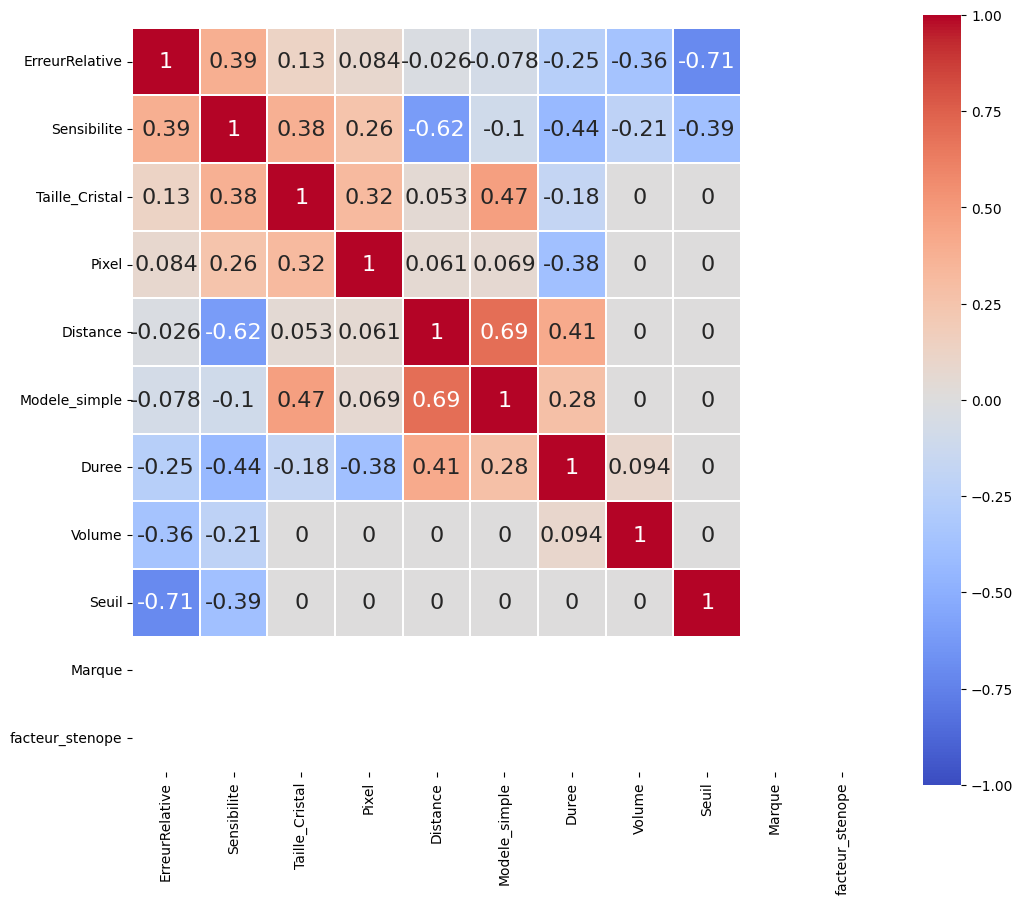

In [58]:
# 'Sensibilite' correlation matrix
#df_marks = df_marks.drop(['chemistry'], axis=1) #enléve l'erreur
k = 13
 #number of variables for heatmap
corrmat = Df_trier.corr(method='spearman')
ix = corrmat.sort_values('ErreurRelative', ascending=False).index
Df_trier_sorted = Df_trier.loc[:, ix]
corrmat_sorted = Df_trier_sorted.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
cols=corrmat_sorted.index
sns.heatmap(corrmat_sorted, ax=ax, cmap="coolwarm", linewidths=0.3, yticklabels=cols.values, xticklabels=cols.values,annot=True,vmax=1, vmin=-1, center=0,  annot_kws={'size': 16}, square=True)

#si on veut rajouter le p values:
#https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

In [59]:
#'ErreurRelative' names, coor, pvalue, pavlue corrected:
name='ErreurRelative' #valeur avec lesquelle on recherche une correlation
corr_pvalue =  Df_trier.corr(method=spearmanr_pval)
#Sens_corr=[[]]
Df_Corr_ER= pd.DataFrame()
Df_Corr_ER['corr']=corrmat[name]
Df_Corr_ER['Abs(corr)']=abs(corrmat[name])
Df_Corr_ER['pvalue']=corr_pvalue[name].values
Df_Corr_ER=Df_Corr_ER.drop('Sensibilite', axis=0)
Df_Corr_ER=Df_Corr_ER.drop('ErreurRelative', axis=0)
Df_Corr_ER=Df_Corr_ER.sort_values(by='Abs(corr)', ascending=False)
#corr_pvalue['Sensibilite'].values
Df_Corr_ER['benjaminiHochberg']=statsmodels.stats.multitest.multipletests(Df_Corr_ER['pvalue'].values, alpha=0.05, method='fdr_bh', is_sorted=True, returnsorted=False)[0] #fdr_bh : Benjamini/Hochberg (non-negative)

Df_Corr_ER

<ipython-input-53-71fb9f943a9b>:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(x,y)[1]


,corr,Abs(corr),pvalue,benjaminiHochberg
Seuil,-0.710553,0.710553,1.331401e-56,True
Volume,-0.359997,0.359997,1.864284e-12,True
Duree,-0.252514,0.252514,1.214005e-06,True
Taille_Cristal,0.127687,0.127687,1.534273e-02,True
Pixel,0.083812,0.083812,1.124017e-01,False
Modele_simple,-0.077881,0.077881,1.402689e-01,False
Distance,-0.025887,0.025887,6.244523e-01,False
Marque,NaN,NaN,NaN,False
facteur_stenope,NaN,NaN,NaN,False


#redaction rapport

In [ ]:
1) bilan des données collectés/ hétérogenéité des pratiques

2)trie des données remplissage par cdm et sensibilités théorique plutot que nom pour les collimateur

3)sensibilitées, valeur absolue:
  a)ensemble des données
  b)différences en fonction des collimatteur/machine/radionucléide...
  c)influence du volume
  d) optimisation du seuillage?
4)Erreur relative sur la sensibilité:
  a)toutes les données
  b) analyse univarié
  c) analyse multivarié